In [1]:
!pip install xee

In [2]:
import matplotlib.pyplot as plt
import ee
import geemap
import xarray as xr
import xee

In [3]:
ee.Authenticate()
ee.Initialize(project = 'air-quality-466614', opt_url = 'https://earthengine-highvolume.googleapis.com')

In [4]:
gaul = (ee.FeatureCollection("FAO/GAUL/2015/level2")
        .filter(ee.Filter.eq('ADM0_NAME', 'Sri Lanka')))

roi = gaul.geometry()

In [ ]:
Map = geemap.Map()
Map.center_object(roi, 8)
Map.addLayer(roi, {'color': 'red'}, 'Sri Lanka Boundary')
Map

Map(center=[7.622299005385482, 80.70087502370576], controls=(WidgetControl(options=['position', 'transparent_b…

# **Yearly Data**

In [5]:
yearly_data = ee.ImageCollection("projects/sat-io/open-datasets/GHAP/GHAP_Y1K_PM25").filterDate('2017','2023')

In [6]:
yearly_dataset=xr.open_dataset(yearly_data,
                                engine='ee',
                                crs='EPSG:4326',
                                geometry=roi,
                                scale=0.001
                                )

In [7]:
yearly_avg=yearly_dataset.mean(dim=['lat','lon'])*0.1

In [ ]:
yearly_df=yearly_avg.to_dataframe()

<Axes: xlabel='time'>

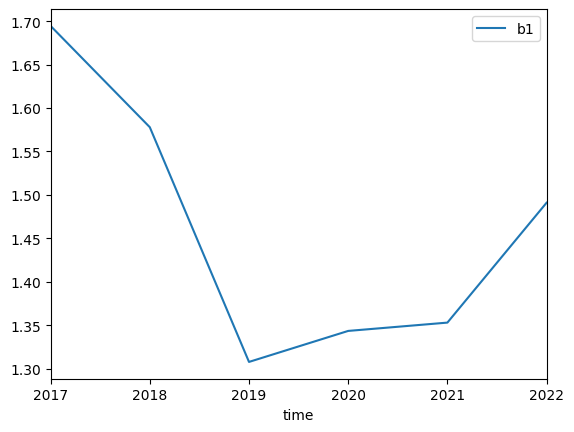

In [ ]:
yearly_df.plot()

In [ ]:
yearly_dataset

<xarray.Dataset> Size: 222MB
Dimensions:  (time: 6, lon: 2358, lat: 3916)
Coordinates:
  * time     (time) datetime64[ns] 48B 2017-01-01 2018-01-01 ... 2022-01-01
  * lon      (lon) float64 19kB 79.52 79.52 79.52 79.52 ... 81.88 81.88 81.88
  * lat      (lat) float64 31kB 5.92 5.921 5.922 5.923 ... 9.833 9.834 9.835
Data variables:
    b1       (time, lon, lat) float32 222MB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
yearly_dataset_scaled = yearly_dataset * 0.1

In [ ]:
yearly_mean = yearly_dataset.mean(dim=['lat','lon'])

In [8]:
yearly_mean = yearly_dataset.mean(dim=['lat','lon'])

In [9]:
yearly_mean_scaled = yearly_mean * 0.1

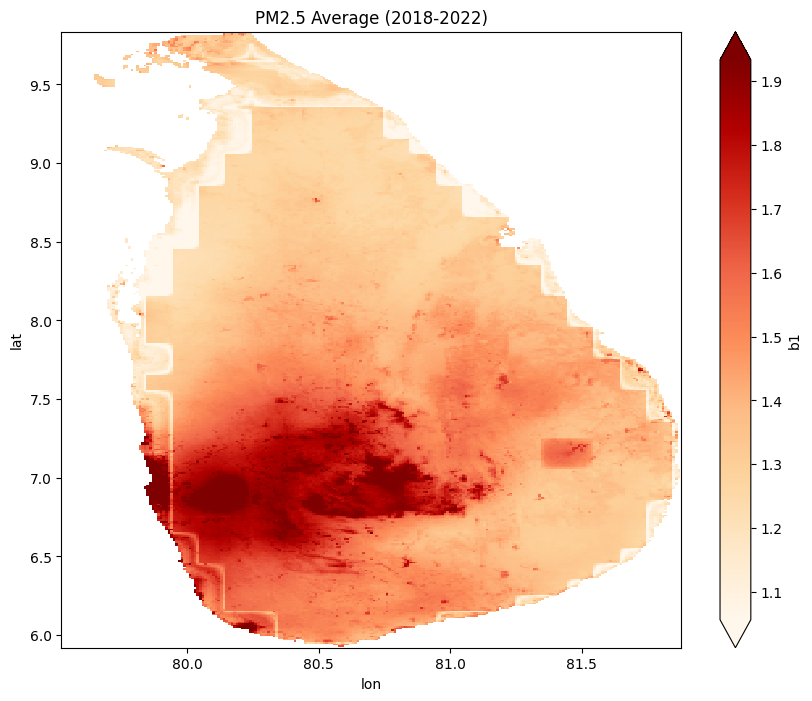

In [ ]:
import matplotlib.pyplot as plt

# Compute the mean over time (yearly average over 2018-2022)
yearly_mean = yearly_dataset['b1'].mean(dim='time')
yearly_mean_scaled = yearly_mean *0.1

# Plot the spatial map
yearly_mean_scaled.plot(
    x="lon",
    y="lat",
    robust=True,
    cmap="OrRd",
    figsize=(10,8)
)

plt.title("PM2.5 Average (2018-2022)")
plt.savefig("Yearly_Average_PM25.png", dpi=360, bbox_inches="tight")
plt.show()


In [11]:
yearly_dataset_scaled = yearly_dataset * 0.1

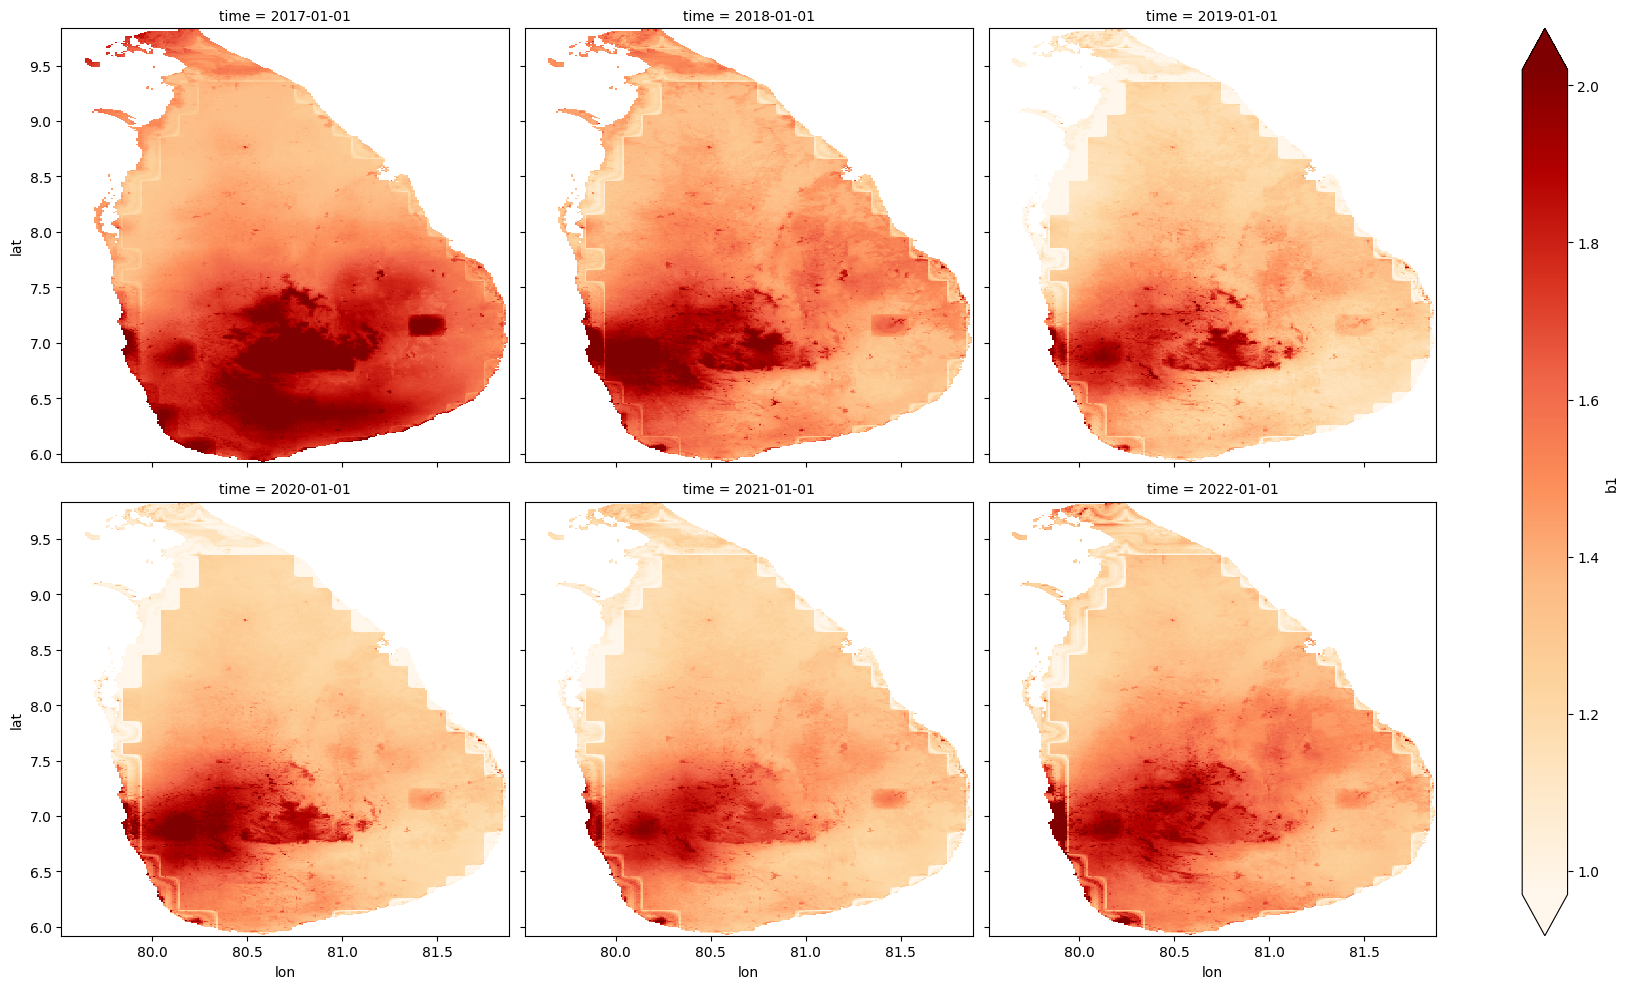

In [14]:
yearly_dataset_scaled.b1.plot(
    x="lon",
    y="lat",
    col="time",         # creates one subplot per time (year)
    robust=True,        # auto robust color scaling
    cmap="OrRd",
    col_wrap=3,         # wrap subplots, e.g., 3 per row
    figsize=(18,10),
    aspect="equal"
)

# 3. Add title and save
plt.savefig("Yearly_PM25.png", dpi=360, bbox_inches="tight")
plt.show()

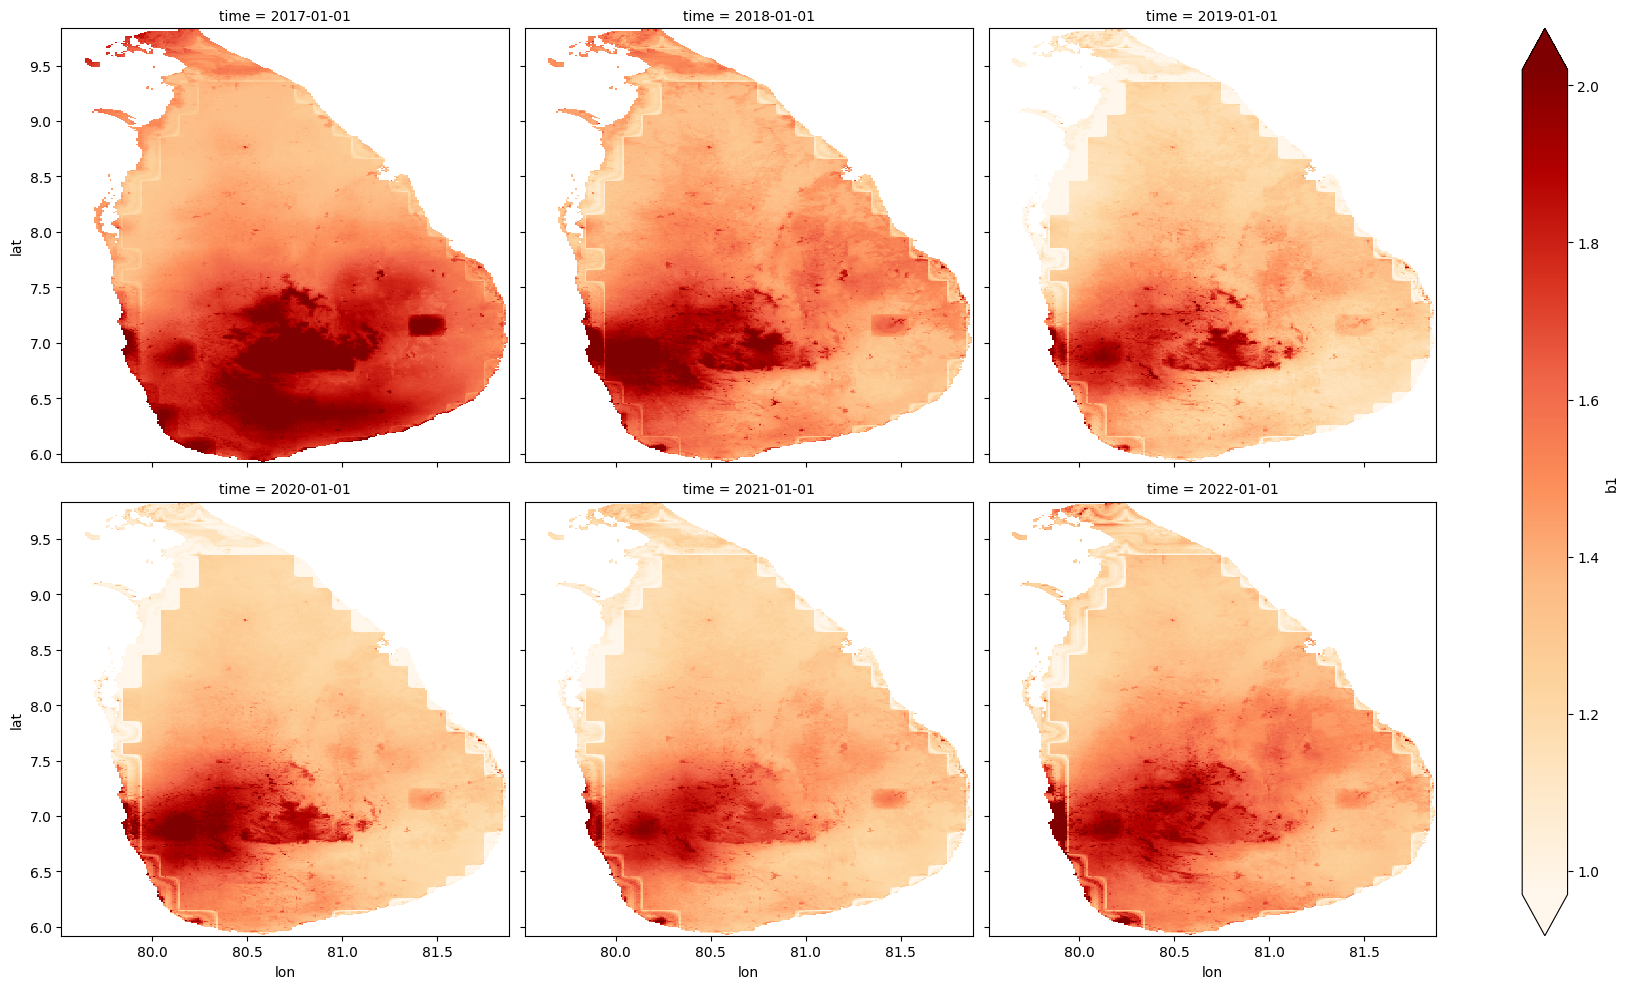

In [ ]:
yearly_dataset_scaled.b1.plot(
    x="lon",
    y="lat",
    col="time",         # creates one subplot per time (year)
    robust=True,        # auto robust color scaling
    cmap="OrRd",
    col_wrap=3,         # wrap subplots, e.g., 3 per row
    figsize=(18,10)
)

# 3. Add title and save
plt.savefig("Yearly_PM25.png", dpi=360, bbox_inches="tight")
plt.show()